# Drogie Walidatorki,
Życzę miłej lektury naszej pracy, mam nadzieję, że jest w jakikolwiek sposób czytelna a notatniki nie są takie złe. Jako, że miałem dowolność w sposobie zapisu modeli, to je zserializowałem. Może brzmi strasznie, ale nie jest. Poniżej poradnik jak się z nimi obchodzić. Dane do testu są w katalogu ./data w głownym katalogu.

No dobra, a teraz jak się zabrać za modele? W razie jakbyście nie miały z tym do czynienia to już piszę:
1. Zaimportuj pickle
2. Wczytaj model (są już zfitowane)
3. Każ mu przewidzieć przyszłość.
4. Wybierz jakąś dobrą metrykę, żeby się zgadzało z tym co jest w modelowaniu.

Na dole szybki pokaz, udanej zabawy!

## UWAGA! JEŻELI MODEL KRZYCZY O NIEPOPRAWNYCH DANYCH DROPNIJCIE KOLUMNĘ 'Income'

In [1]:
import pickle as pkl

In [2]:
with open("./Milestone_3/models/first_dnn.pkl", "rb") as file:
    model = pkl.load(file)

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("data/test.csv")

In [5]:
X_test, y_test = data.drop(["Chronic Medical Conditions", "Income"], axis=1), data["Chronic Medical Conditions"]

In [6]:
y_pred = model.predict(X_test)

2587/2587 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step   


In [7]:
from sklearn.metrics import ConfusionMatrixDisplay

Jako, że jest to sieć neuronowa, trzeba wybrać drugą kolumnę i wyznaczyć te większe od 0.5. W innych modelach predykcje są prostolinijne.

In [8]:
y_pred.shape

(82754, 10)

In [9]:
y_pred = (y_pred[:, 1] >= 0.5)

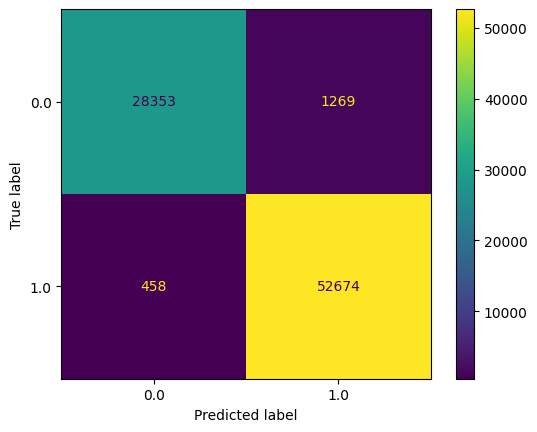

In [10]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred)